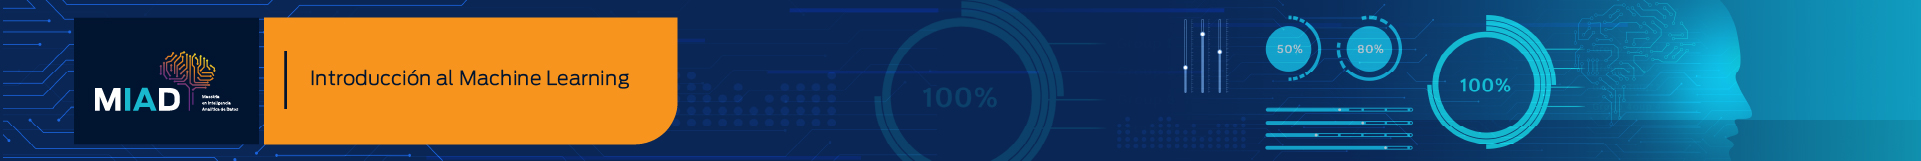

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-smarket

### Librerías

In [3]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Carga de la base de datos

In [5]:
filename = "https://raw.githubusercontent.com/Federico-Higuera/FedericoHiguera/main/IntroduccionMachineLearning/CasoSemana3/dataset-18213.csv"
data = pd.read_csv(filename, header=0, sep=",")

DATA DESCRIPTION:

A data frame with 1250 observations on the following 9 variables.

- Year: The year that the observation was recorded
- Lag1: Percentage return for previous day
- Lag2: Percentage return for 2 days previous
- Lag3: Percentage return for 3 days previous
- Lag4: Percentage return for 4 days previous
- Lag5: Percentage return for 5 days previous
- Volume: Volume of shares traded (number of daily shares traded in billions)
- Today: Percentage return for today


- Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day

Source:
Raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged.

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [8]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

data

print("En la data inicial tenemos: ",data.shape[0],"observaciones y ",data.shape[1],"variables predictoras") 
df = data.dropna() #Eliminamos las observaciones con datos faltantes
print("\nDespues de realizar perfilamiento de la data se puede apreciar que no hay datos corruptos en el dataset: ")
print("-Observaciones: ",df.shape[0],"  -Variables predictoras: ",df.shape[1]) 

En la data inicial tenemos:  1250 observaciones y  9 variables predictoras

Despues de realizar perfilamiento de la data se puede apreciar que no hay datos corruptos en el dataset: 
-Observaciones:  1250   -Variables predictoras:  9


In [9]:
#SEPARAMOS LAS VARIABLES PREDICTORAS DE LA VARIABLE DE REPSUESTA Y OBTENEMOS LOS DATOS DE TRAIN Y TEST

XTotal = df[['Year','Lag1','Lag2','Lag3','Lag4','Lag5','Volume','Today']]
yTotal = df['Direction']

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

yTest = yTest.to_numpy() #Convertimos de Pandas a Numpy
print(type(yTest))

<class 'numpy.ndarray'>


### Histograma para cada uno de los predictores

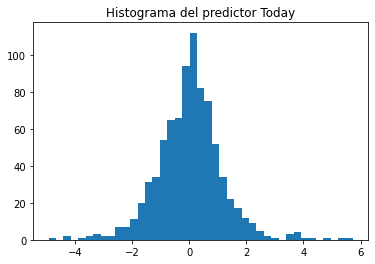

In [17]:
#Para imprimir el histrograma de cada predictor
#Solo se debe variar el parámetro "feature" el cual tiene un rango de 1 a 8 (cantidad de predictores)

feature = 8
plt.hist(XTrain.iloc[:,feature-1], bins='auto')
mensaje = ['Histograma del predictor', str(XTrain.columns[feature-1])]
plt.title(" ".join(mensaje))
plt.show()

### Histograma para la variable de respuesta

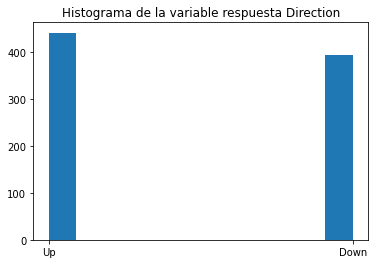

In [9]:
plt.hist(yTrain, bins='auto')
mensaje = ['Histograma de la variable respuesta', str(yTrain.name)]
plt.title(" ".join(mensaje))
plt.show()

### Correlogramas de los predictores

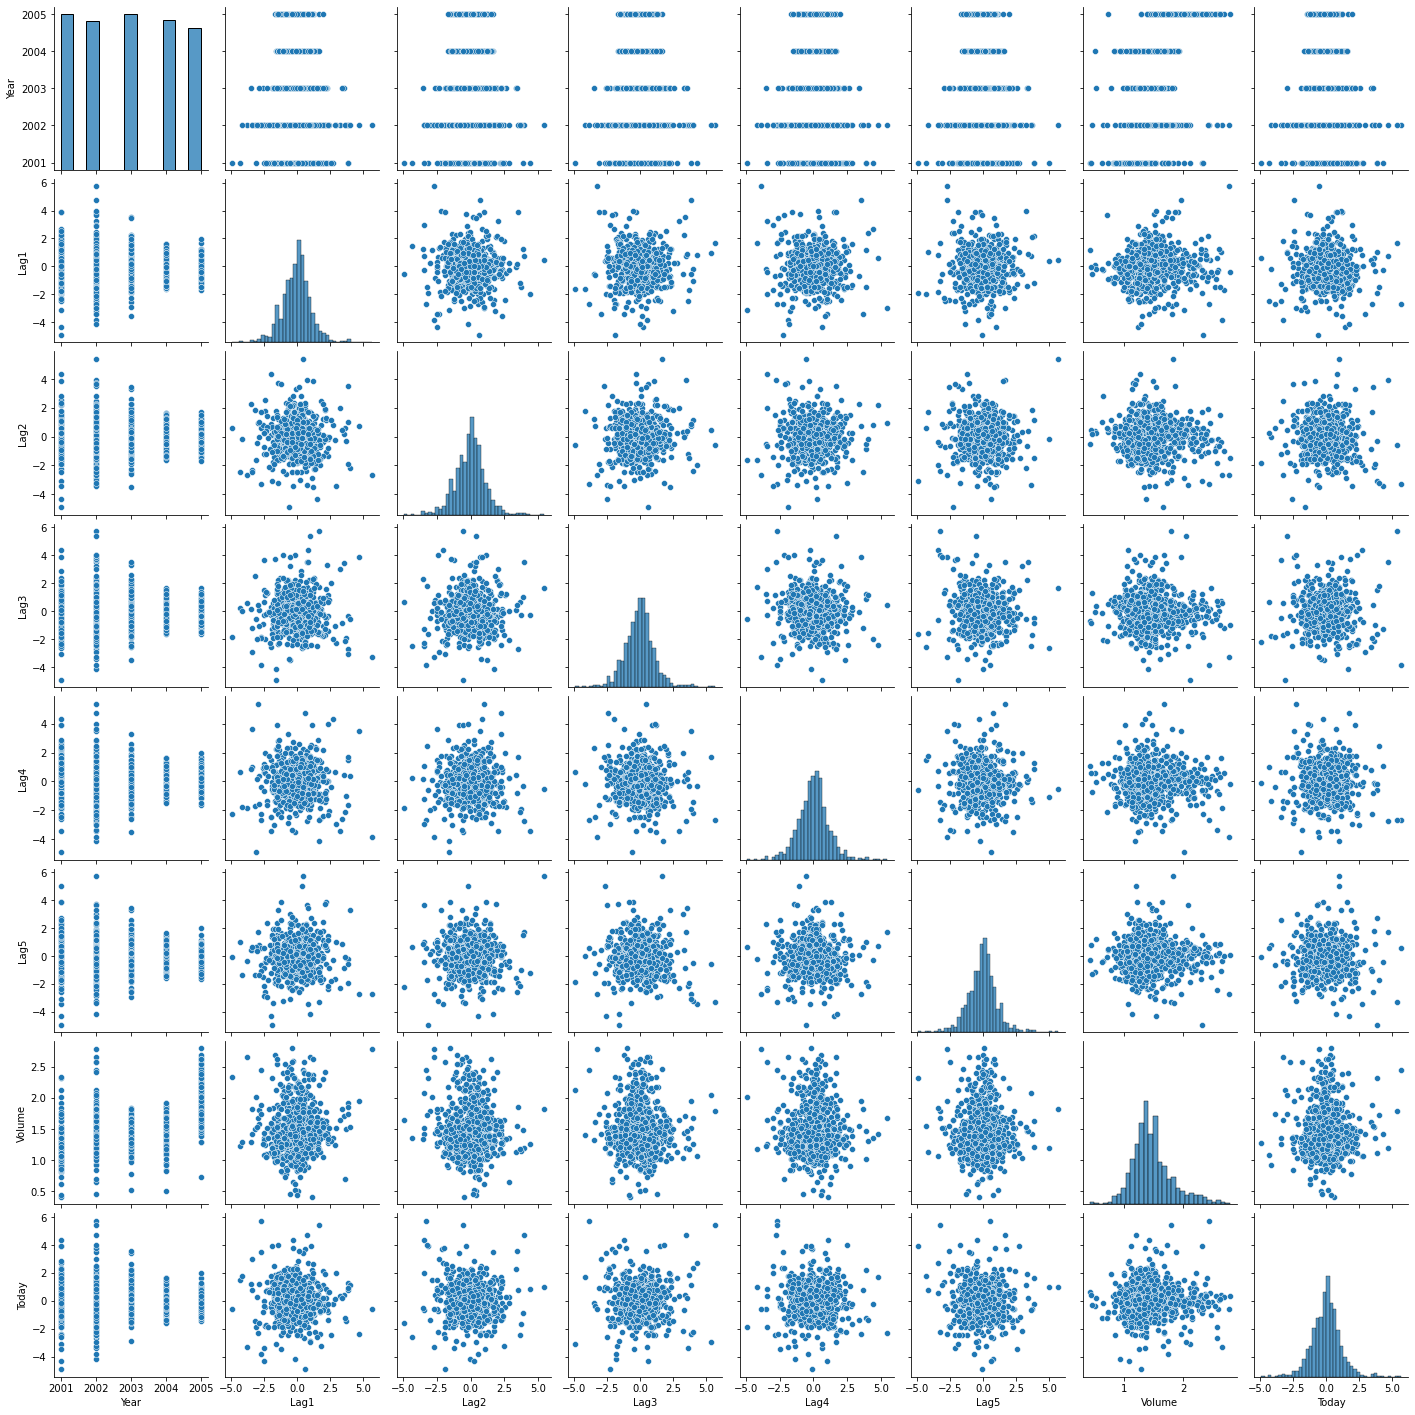

In [10]:
#Correlogramas de los predictores
sns.pairplot(XTrain, kind="scatter")
plt.show()

### Mapa de Calor de los predictores

<AxesSubplot:>

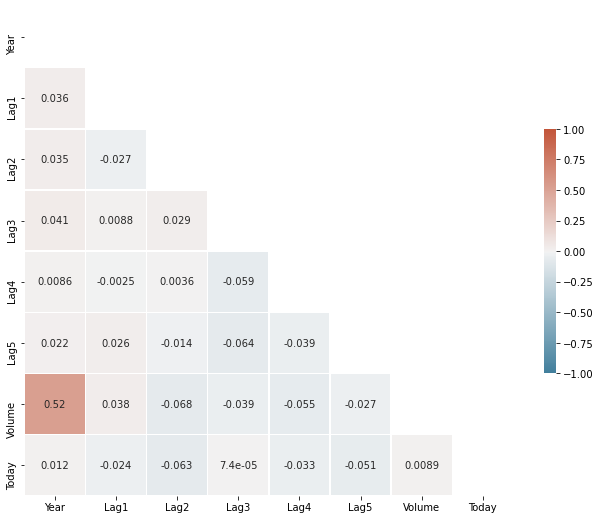

In [11]:
corr = XTrain.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Estadísticas descriptivas de los predictores

In [12]:
print(df.describe())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

#### Descripción del procedimiento
0. Se realiza la carga de los datos, de los cuales, se realiza una descripción general de las variables predictoras disponibles en el dataset, variable respuesta y dimensiones de la misma.
1. Se realiza la partición del data set, en datos de entrenamiento y pruebas.
2. Se construyen los histogramas independientes, así como los gráficos de correlación entre cada pareja de variables disponible en el dataset.
3. Se construye el mapa de calor que facilita la identificación de correlación entre las variables predictoras.


#### Conclusiones
1. La variabe 'Year' presenta una distribución uniforme, las variables Lag1, Lag2, Lag3, Lag4, Lag5 y Today son de tipo continuo con distribución normal y media centrada en 0.
2. No se identifica una correlación significativamente alta entre los distintos pares de parejas predictoras, la de mayor relevancia es entre las variables 'year' y 'Volume' cuya correlación es de 0.52.

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [28]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

#Primero estimamos el modelo con la muestra de entrenamiento
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain, yTrain)

#Estimamos la clase y las probabilidades de pertenecer a cada clase
prediccionesLDA=clfLDA.predict(XTest)
prediccionesProbLDA=clfLDA.predict_proba(XTest)

#Calculamos el error de predicción
errorLDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesLDA[i]):
        errorLDA+=1/len(yTest)

# Confirmar esto!!!!!!!!!!!!!!!!!!!!!!!
accuracyLDA = 1 - errorLDA
        
        
print('El error de clasificación para LDA en la muestra de test es:')
print(errorLDA)
print()
print('la precisión del modelo de clasificación tipo LDA en la muestra de test es:')
print(accuracyLDA)


El error de clasificación para LDA en la muestra de test es:
0.055690072639225166

la precisión del modelo de clasificación tipo LDA en la muestra de test es:
0.9443099273607748


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

#### Procedimiento
1. Se realiza la estimación y ajuste del modelo LDA a partir de la muestra destinada para entrenamiento
2. Se obtienen los valores de la predicción con el modelo ajustado
3. Se realiza el cálculo del error y Accuracy del modelo.

#### Conclusiones

** Teniendo en consideración el contexto del problema, se asigna una relevancia alta, tanto a la correcta predicción de 'Up', como de 'Down' por lo tanto se define el Accuracy como la métrica de medición apropiada, dado que considera tanto el éxito en la predicción de Verdaderos positivos como de Verdaderos negativos.

1. La precisión del modelo es significativamente alto, con una tasa de acierto del 94.4%

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [29]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

#estimamos el modelo con la muestra de entrenamiento
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

#Estimamos la clase y las probabilidades de pertenecer a cada clase
prediccionesQDA=clfQDA.predict(XTest)
prediccionesProbQDA=clfQDA.predict_proba(XTest)

#Calculamos el error de predicción
errorQDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
accuracyQDA = 1 - errorQDA
        
print('El error de clasificación para QDA en la muestra de test es:')
print(errorQDA)
print()
print('la precisión del modelo de clasificación tipo QDA en la muestra de test es:')
print(accuracyQDA)

El error de clasificación para QDA en la muestra de test es:
0.07263922518159803

la precisión del modelo de clasificación tipo QDA en la muestra de test es:
0.927360774818402


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

#### Procedimiento
1. Se realiza la estimación y ajuste del modelo QDA a partir de la muestra destinada para entrenamiento
2. Se obtienen los valores de la predicción con el modelo ajustado
3. Se realiza el cálculo del error y Accuracy del modelo.

#### Conclusiones

1. Aunque la precisión del modelo es significativamente alto, con una tasa de acierto del 92.7%, su desempeño predictivo en la muestra Test es inferior a la del modelo LDA.

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [30]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

#Estimamos el modelo de Bayes
clfNB = GaussianNB()
clfNB.fit(XTrain, yTrain)

#Estimamos la clase y las probabilidades de pertenecer a cada clase
prediccionesNB=clfNB.predict(XTest)
prediccionesProbNB=clfNB.predict_proba(XTest)

#Calculamos el error de predicción para el modelo de Naive Bayes
errorNB=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesNB[i]):
        errorNB+=1/len(yTest)
        
print('El error de clasificación para Naive Bayes en la muestra de test es:')
print(errorNB)
print()
accuracyNB = 1 - errorNB
print('la precisión del modelo tipo Naive Bayes en la muestra de test es:')
print(accuracyNB)

El error de clasificación para Naive Bayes en la muestra de test es:
0.0460048426150121

la precisión del modelo tipo Naive Bayes en la muestra de test es:
0.9539951573849879


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

#### Procedimiento
1. Se realiza la estimación y ajuste del modelo NB a partir de la muestra destinada para entrenamiento
2. Se obtienen los valores de la predicción con el modelo ajustado
3. Se realiza el cálculo del error y Accuracy del modelo.

#### Conclusiones

1. La precisión del modelo es significativamente alta, con una tasa de acierto del 92.4%, hasta el momento es aquel que presenta mayor su desempeño predictivo en la muestra Test.

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [31]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

#Estimamos el modelo de regresión logística
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(XTrain,yTrain)

#Estimamos la clase y las probabilidades de pertenecer a cada clase
prediccionesRegLog=clfRegLog.predict(XTest)
prediccionesProbRegLog=clfRegLog.predict_proba(XTest)

#Calculamos el error de predicción para el modelo de regresión logística
errorRegLog=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesRegLog[i]):
        errorRegLog+=1/len(yTest)
        
accuracyRegLog = 1 - errorRegLog
        
print('El error de clasificación para la regresión logística en la muestra de test es:')
print(errorRegLog)
print()
print('la precisión del modelo de Regresión Logística en la muestra de test es:')
print(accuracyRegLog)

El error de clasificación para la regresión logística en la muestra de test es:
0.024213075060532694

la precisión del modelo de Regresión Logística en la muestra de test es:
0.9757869249394673


In [75]:
#precisionRegLog=precision_score(y_true=yTest, y_pred=prediccionesRegLog)
#print(precisionRegLog)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

#### Procedimiento
1. Se realiza la estimación y ajuste del modelo RegLog a partir de la muestra destinada para entrenamiento
2. Se obtienen los valores de la predicción con el modelo ajustado
3. Se realiza el cálculo del error y Accuracy del modelo.

#### Conclusiones

1. La precisión del modelo es significativamente alto, con una tasa de acierto del 97.6%, su desempeño predictivo en la muestra Test es la mejor en comparación a los modelos previamente descritos.

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

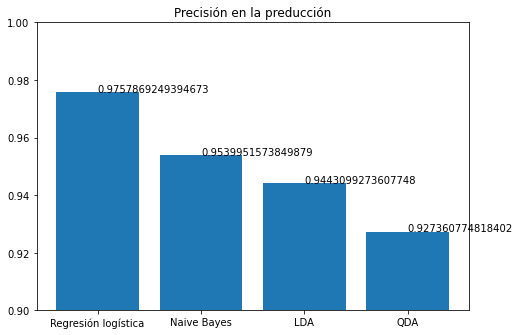

In [34]:
#GRAFICAMOS EL ACCURACY DE LOS MODELOS PARA COMPARARLOS ENTRE SÍ Y PODER ELEGIR EL MEJOR MODELO 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Precisión en la preducción")
ejeX = ['Regresión logística', 'Naive Bayes','LDA','QDA']
ejeY = [accuracyRegLog,accuracyNB,accuracyLDA,accuracyQDA]
plt.ylim(0.90,1)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)

#### Procedimiento
1. Se construye la comparación visual, a través de un diagrama de barras, del desempeño predictivo de los modelos evaluados, en este se considera el Accuracy como métrica relevante para la comparación.

#### Conclusiones

1. Para el problema de predicción del comportamiento del índice de precio, se considera como modelo con mayor capacidad predictiva en la muestra Test el de Regresión Logística, ya que es el que presenta un mayor precisión, esto considerando que resulta relevante obtener una predicción correcta tanto para los Ups como los Downs del precio del índice.